In [2]:
"""
Universidad Autónoma de Chihuahua
Facultad de Ingeniería
Maestría en Ingeniería en Computación
Machine Learning
Implementación SVM
Gael Aristides Hinojos Ramírez
384104
"""

'\nUniversidad Autónoma de Chihuahua\nMachine Learning\nImplementación SVM\nGael Aristides Hinojos Ramírez\n'

Paquetes utilizados en la práctica.

In [3]:
import pandas as pd
import matplotlib.pyplot as pt
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

Se obtiene la información del data set de urls y se hace una descripción de los datos.

In [4]:
url = pd.read_csv('urls.csv')
url = url.drop('argPathRatio', axis=1)
url.describe()

,Querylength,domain_token_count,path_token_count,avgdomaintokenlen,longdomaintokenlen,avgpathtokenlen,tld,charcompvowels,charcompace,ldl_url,...,SymbolCount_Directoryname,SymbolCount_FileName,SymbolCount_Extension,SymbolCount_Afterpath,Entropy_URL,Entropy_Domain,Entropy_DirectoryName,Entropy_Filename,Entropy_Extension,Entropy_Afterpath
count,15367.000000,15367.000000,15367.000000,15367.000000,15367.000000,15096.000000,15367.000000,15367.000000,15367.000000,15367.000000,...,15367.000000,15367.000000,15367.000000,15367.000000,15367.000000,15367.000000,13541.000000,15177.000000,15364.000000,15364.000000
mean,3.446021,2.543698,8.477061,5.851956,10.027461,5.289936,2.543698,12.659986,8.398516,1.910913,...,2.120843,1.124618,0.500813,-0.158782,0.721684,0.854232,0.634859,0.682896,0.313617,-0.723793
std,14.151453,0.944938,4.660250,2.064581,5.281090,3.535097,0.944938,8.562206,6.329007,4.657731,...,2.777307,2.570246,2.261013,2.535939,0.049246,0.072641,0.510992,0.502288,0.576910,0.649785
min,0.000000,2.000000,0.000000,1.500000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,0.419560,0.561913,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.000000,2.000000,5.000000,4.500000,7.000000,3.800000,2.000000,6.000000,4.000000,0.000000,...,1.000000,0.000000,0.000000,-1.000000,0.687215,0.798231,0.709532,0.707165,0.000000,-1.000000
50%,0.000000,2.000000,8.000000,5.500000,9.000000,4.500000,2.000000,11.000000,7.000000,0.000000,...,2.000000,0.000000,0.000000,-1.000000,0.723217,0.859793,0.785949,0.814038,0.000000,-1.000000
75%,0.000000,3.000000,11.000000,6.666666,12.000000,5.571429,3.000000,17.000000,11.000000,1.000000,...,3.000000,1.000000,0.000000,-1.000000,0.757949,0.916667,0.859582,0.916667,1.000000,-1.000000
max,173.000000,19.000000,68.000000,29.500000,63.000000,105.000000,19.000000,94.000000,62.000000,58.000000,...,24.000000,31.000000,30.000000,29.000000,0.869701,1.000000,0.962479,1.000000,1.000000,1.000000


Se observan las primeras 5 filas del dataframe.

In [5]:
url.head(5)

,Querylength,domain_token_count,path_token_count,avgdomaintokenlen,longdomaintokenlen,avgpathtokenlen,tld,charcompvowels,charcompace,ldl_url,...,SymbolCount_FileName,SymbolCount_Extension,SymbolCount_Afterpath,Entropy_URL,Entropy_Domain,Entropy_DirectoryName,Entropy_Filename,Entropy_Extension,Entropy_Afterpath,URL_Type_obf_Type
0,0,2,12,5.5,8,4.083334,2,15,7,0,...,-1,-1,-1,0.676804,0.860529,-1.000000,-1.000000,-1.00000,-1.000000,benign
1,0,3,12,5.0,10,3.583333,3,12,8,2,...,1,0,-1,0.715629,0.776796,0.693127,0.738315,1.00000,-1.000000,benign
2,2,2,11,4.0,5,4.750000,2,16,11,0,...,2,0,1,0.677701,1.000000,0.677704,0.916667,0.00000,0.898227,benign
3,0,2,7,4.5,7,5.714286,2,15,10,0,...,0,0,-1,0.696067,0.879588,0.818007,0.753585,0.00000,-1.000000,benign
4,19,2,10,6.0,9,2.250000,2,9,5,0,...,5,4,3,0.747202,0.833700,0.655459,0.829535,0.83615,0.823008,benign


Se observan los nombres de todas las características.

In [6]:
url.columns

Index(['Querylength', 'domain_token_count', 'path_token_count',
       'avgdomaintokenlen', 'longdomaintokenlen', 'avgpathtokenlen', 'tld',
       'charcompvowels', 'charcompace', 'ldl_url', 'ldl_domain', 'ldl_path',
       'ldl_filename', 'ldl_getArg', 'dld_url', 'dld_domain', 'dld_path',
       'dld_filename', 'dld_getArg', 'urlLen', 'domainlength', 'pathLength',
       'subDirLen', 'fileNameLen', 'this.fileExtLen', 'ArgLen', 'pathurlRatio',
       'ArgUrlRatio', 'argDomanRatio', 'domainUrlRatio', 'pathDomainRatio',
       'executable', 'isPortEighty', 'NumberofDotsinURL',
       'ISIpAddressInDomainName', 'CharacterContinuityRate',
       'LongestVariableValue', 'URL_DigitCount', 'host_DigitCount',
       'Directory_DigitCount', 'File_name_DigitCount', 'Extension_DigitCount',
       'Query_DigitCount', 'URL_Letter_Count', 'host_letter_count',
       'Directory_LetterCount', 'Filename_LetterCount',
       'Extension_LetterCount', 'Query_LetterCount', 'LongestPathTokenLength',
       

Se obtiene la cantidad de filas en el dataframe.

In [7]:
len(url)

15367

Se obtienen las clases en las que se pueden clasificar las instancias.

In [8]:
url['URL_Type_obf_Type'].value_counts()

URL_Type_obf_Type
benign      7781
phishing    7586
Name: count, dtype: int64

Se busca el tipo de dato de cada columna, además de la cantidad de celdas con valores nulos.

In [10]:
url.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15367 entries, 0 to 15366
Data columns (total 79 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Querylength                      15367 non-null  int64  
 1   domain_token_count               15367 non-null  int64  
 2   path_token_count                 15367 non-null  int64  
 3   avgdomaintokenlen                15367 non-null  float64
 4   longdomaintokenlen               15367 non-null  int64  
 5   avgpathtokenlen                  15096 non-null  float64
 6   tld                              15367 non-null  int64  
 7   charcompvowels                   15367 non-null  int64  
 8   charcompace                      15367 non-null  int64  
 9   ldl_url                          15367 non-null  int64  
 10  ldl_domain                       15367 non-null  int64  
 11  ldl_path                         15367 non-null  int64  
 12  ldl_filename      

Se grafican todas las características para ver la distribución de los datos.

array([[<Axes: title={'center': 'Querylength'}>,
        <Axes: title={'center': 'domain_token_count'}>,
        <Axes: title={'center': 'path_token_count'}>,
        <Axes: title={'center': 'avgdomaintokenlen'}>,
        <Axes: title={'center': 'longdomaintokenlen'}>,
        <Axes: title={'center': 'avgpathtokenlen'}>,
        <Axes: title={'center': 'tld'}>,
        <Axes: title={'center': 'charcompvowels'}>,
        <Axes: title={'center': 'charcompace'}>],
       [<Axes: title={'center': 'ldl_url'}>,
        <Axes: title={'center': 'ldl_domain'}>,
        <Axes: title={'center': 'ldl_path'}>,
        <Axes: title={'center': 'ldl_filename'}>,
        <Axes: title={'center': 'ldl_getArg'}>,
        <Axes: title={'center': 'dld_url'}>,
        <Axes: title={'center': 'dld_domain'}>,
        <Axes: title={'center': 'dld_path'}>,
        <Axes: title={'center': 'dld_filename'}>],
       [<Axes: title={'center': 'dld_getArg'}>,
        <Axes: title={'center': 'urlLen'}>,
        <Axes: 

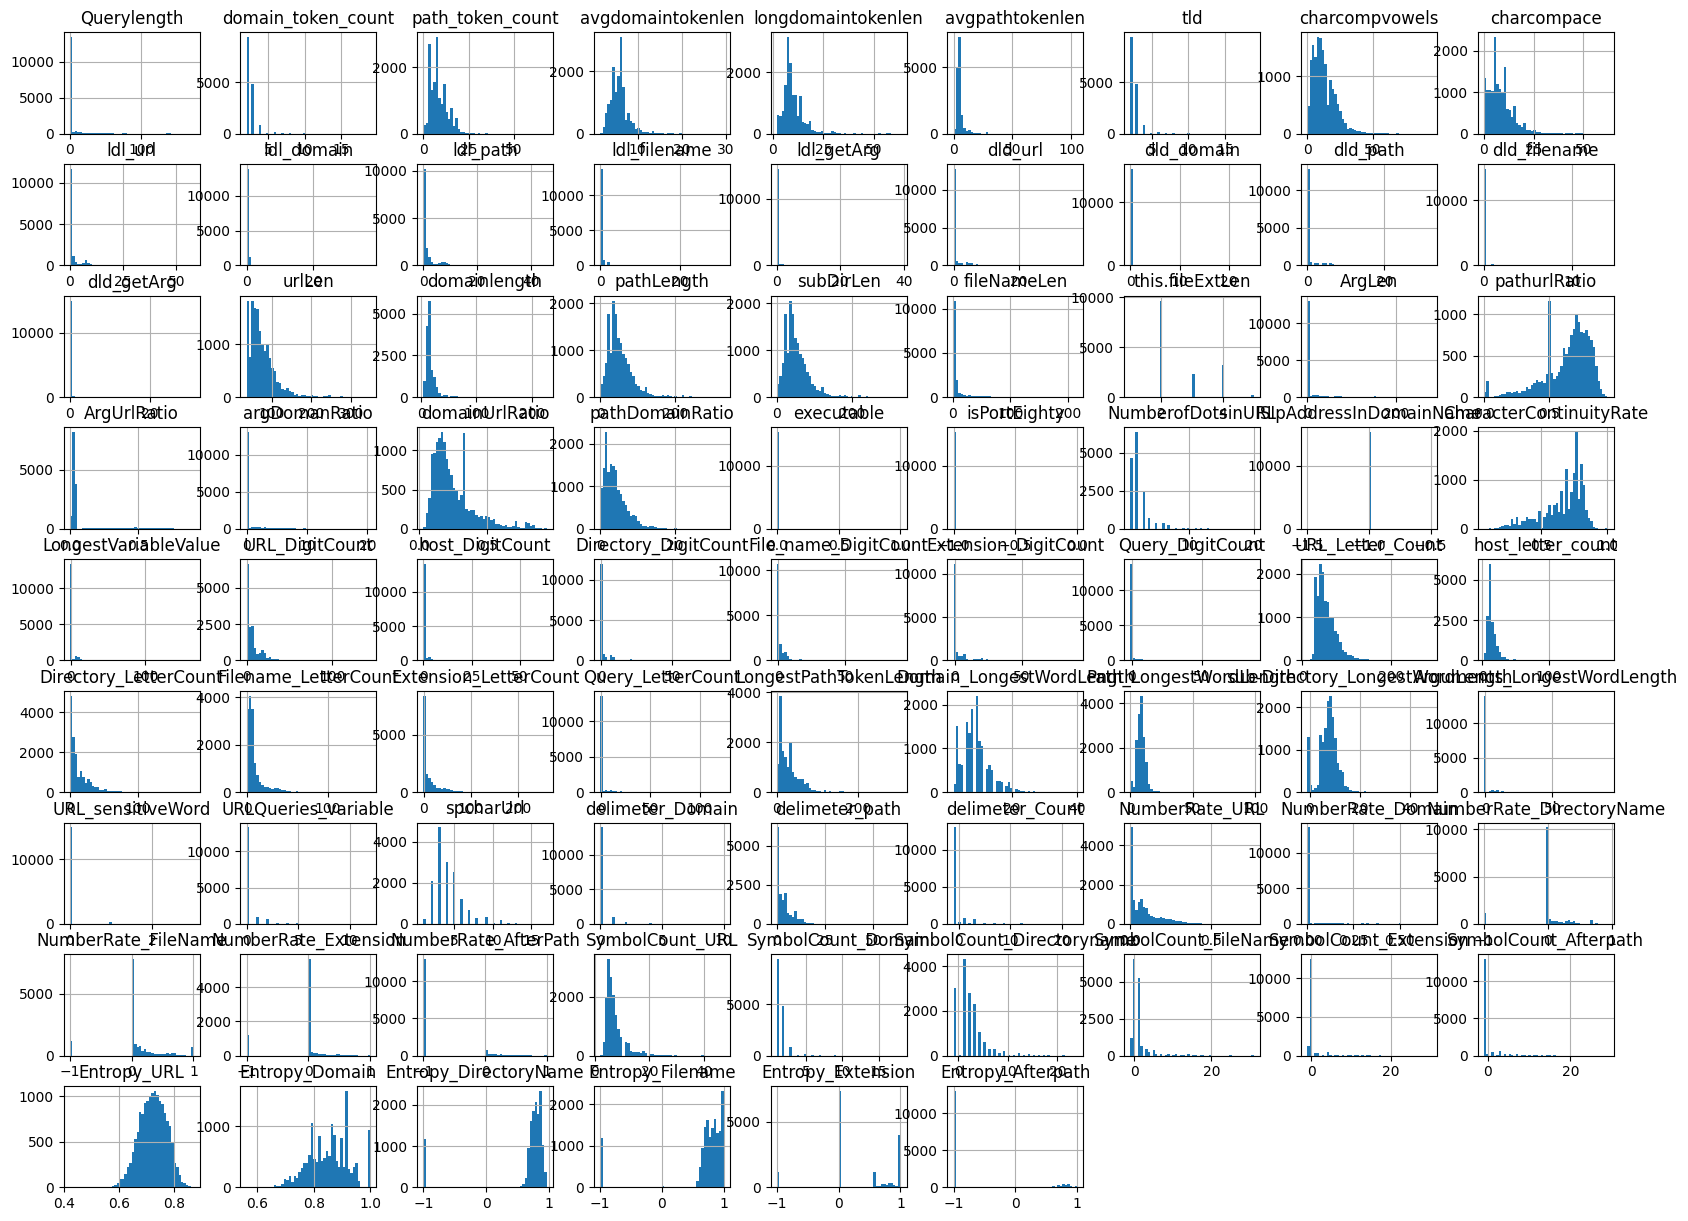

In [11]:
url.hist(bins=50, figsize=(20,15))

Se convierten las etiquetas en valores binarios para poder crear una matriz de correlación.

In [25]:
pd.set_option('display.max_rows', 500)
corr_data = url.copy()
corr_data.loc[corr_data['URL_Type_obf_Type'] == 'benign', 'URL_Type_obf_Type'] = 0
corr_data.loc[corr_data['URL_Type_obf_Type'] == 'phishing', 'URL_Type_obf_Type'] = 1
corr_matrix = corr_data.corr()
corr_matrix['URL_Type_obf_Type'].sort_values(ascending=False)

URL_Type_obf_Type                  1.000000
domainUrlRatio                     0.575217
tld                                0.493899
domain_token_count                 0.493899
SymbolCount_Domain                 0.493899
host_letter_count                  0.475297
domainlength                       0.470524
longdomaintokenlen                 0.409923
NumberofDotsinURL                  0.371471
Domain_LongestWordLength           0.338855
avgdomaintokenlen                  0.285330
ldl_url                            0.251227
ldl_path                           0.242006
delimeter_Domain                   0.222999
dld_url                            0.206423
dld_path                           0.203018
Entropy_URL                        0.200351
Entropy_Extension                  0.200048
Entropy_Filename                   0.199061
NumberRate_Extension               0.177272
SymbolCount_Directoryname          0.177123
SymbolCount_URL                    0.166381
this.fileExtLen                 

Se realiza la partición de los datos estratificada con un radio de 80/20.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(url, url['URL_Type_obf_Type'], random_state=12, test_size=0.2, shuffle=True, stratify=url['URL_Type_obf_Type'])

Se crea un pipeline, el cual va a llenar los valores nulos con la estrategia de media. Además, va a utilizar el Standard Scaler para estandarizar los datos.

In [14]:
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])
url_data = pipeline.fit_transform(X_train.drop('URL_Type_obf_Type', axis=1))

Se realiza un grid search con el modelo de SVM con kernel Lineal.

In [15]:
grid_linear = {
    'kernel': ['linear'], 'C': [1, 10, 25, 50, 100]
}
svm_model = SVC()
grid_search_linear = GridSearchCV(svm_model, grid_linear, cv=5)
grid_search_linear.fit(url_data, y_train)

print('Best Parameters: ', grid_search_linear.best_params_)
print('Best Estimator: ', grid_search_linear.best_estimator_)
print('Best Score: ', grid_search_linear.best_score_)

Best Parameters:  {'C': 50, 'kernel': 'linear'}
Best Estimator:  SVC(C=50, kernel='linear')
Best Score:  0.9673798546777401


El modelo con mejor rendimiento se utiliza para predecir las clases de las instancias de la partición de test. Se obtienen las métricas y la matriz de confusión.

              precision    recall  f1-score   support

      benign       0.96      0.97      0.97      1557
    phishing       0.97      0.96      0.96      1517

    accuracy                           0.97      3074
   macro avg       0.97      0.97      0.97      3074
weighted avg       0.97      0.97      0.97      3074



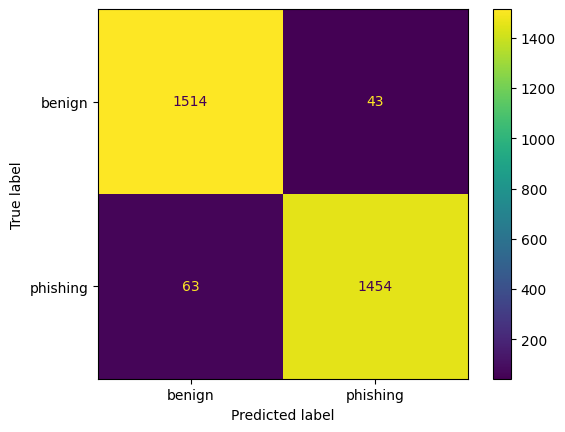

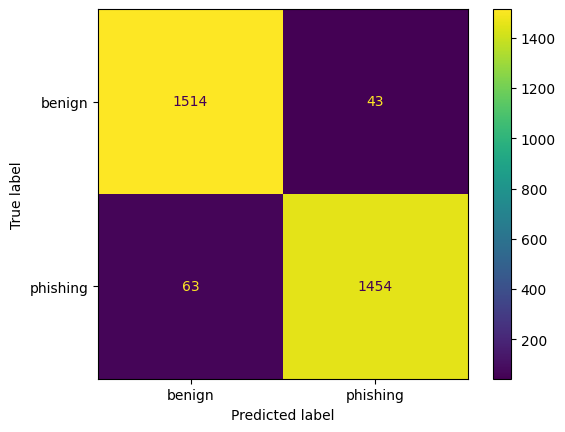

In [16]:
svm_linear_f = grid_search_linear.best_estimator_
labels = ['benign', 'phishing']
url_test = pipeline.transform(X_test.drop('URL_Type_obf_Type', axis=1))
test_pred = svm_linear_f.predict(url_test)
print(classification_report(y_test, test_pred, target_names=labels))
linear_plot = ConfusionMatrixDisplay.from_predictions(y_test, test_pred, display_labels=labels)
linear_plot.plot()

Se realiza un grid search con el modelo de SVM con kernel Polinomial.

In [19]:
poly_grid = {
    'kernel': ['poly'], 'degree': [3, 4, 5, 6], 'coef0': [1., 1.5, 2., 2.5], 'C': [1, 10, 25, 50, 100]
}

grid_search_poly = GridSearchCV(svm_model, poly_grid, cv=5)
grid_search_poly.fit(url_data, y_train)

print('Best Parameters: ', grid_search_poly.best_params_)
print('Best Estimator: ', grid_search_poly.best_estimator_)
print('Best Score: ', grid_search_poly.best_score_)

Best Parameters:  {'C': 10, 'coef0': 2.0, 'degree': 4, 'kernel': 'poly'}
Best Estimator:  SVC(C=10, coef0=2.0, degree=4, kernel='poly')
Best Score:  0.9812898665866344


El modelo con mejor rendimiento se utiliza de la misma manera para predecir las clases de las instancias del set de test.

              precision    recall  f1-score   support

      benign       0.98      0.98      0.98      1557
    phishing       0.98      0.98      0.98      1517

    accuracy                           0.98      3074
   macro avg       0.98      0.98      0.98      3074
weighted avg       0.98      0.98      0.98      3074



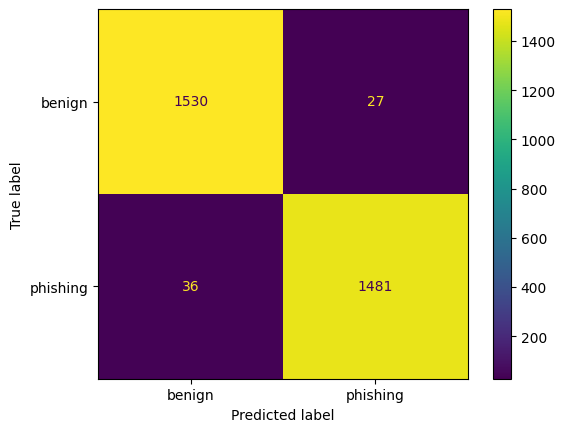

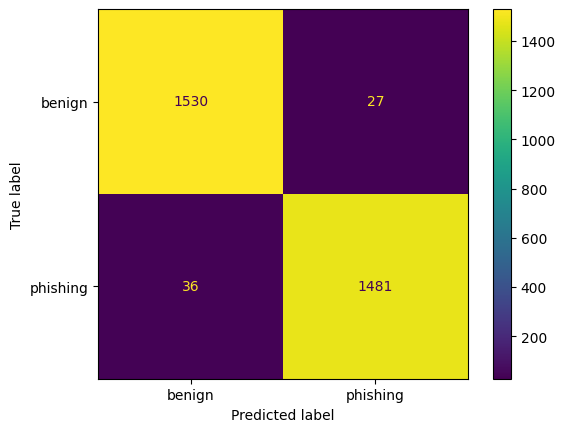

In [20]:
svm_poly_f = grid_search_poly.best_estimator_
test_pred_poly = svm_poly_f.predict(url_test)
print(classification_report(y_test, test_pred_poly, target_names=labels))
poly_plot = ConfusionMatrixDisplay.from_predictions(y_test, test_pred_poly, display_labels=labels)
poly_plot.plot()

Se realiza un grid search con el modelo de SVM con kernel de Gauss.

In [23]:
gauss_grid = {
    'kernel': ['rbf'], 'gamma': ['scale', 'auto'], 'C': [1, 10, 25, 50, 100, 120]
}

grid_search_gauss = GridSearchCV(svm_model, gauss_grid, cv=5)
grid_search_gauss.fit(url_data, y_train)

print('Best Parameters: ', grid_search_gauss.best_params_)
print('Best Estimator: ', grid_search_gauss.best_estimator_)
print('Best Score: ', grid_search_gauss.best_score_)

Best Parameters:  {'C': 120, 'gamma': 'scale', 'kernel': 'rbf'}
Best Estimator:  SVC(C=120)
Best Score:  0.9834862121212623


Se hacen predicciones con el modelo con mejor rendimiento y se obtienen las métricas.

              precision    recall  f1-score   support

      benign       0.98      0.98      0.98      1557
    phishing       0.98      0.98      0.98      1517

    accuracy                           0.98      3074
   macro avg       0.98      0.98      0.98      3074
weighted avg       0.98      0.98      0.98      3074



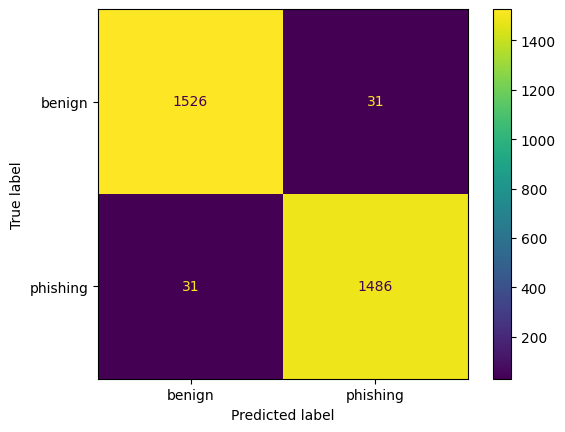

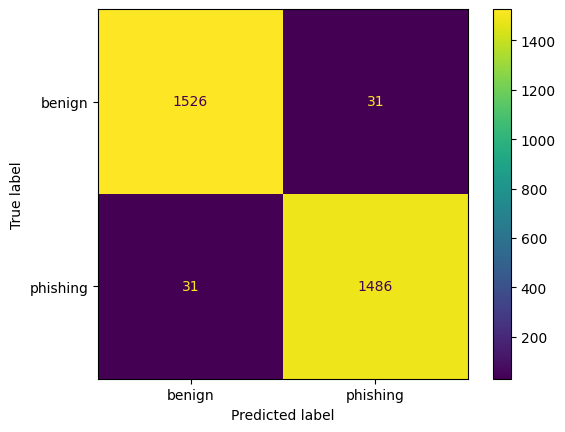

In [24]:
svm_gauss_f = grid_search_gauss.best_estimator_
test_pred_gauss = svm_gauss_f.predict(url_test)
print(classification_report(y_test, test_pred_gauss, target_names=labels))
gauss_plot = ConfusionMatrixDisplay.from_predictions(y_test, test_pred_gauss, display_labels=labels)
gauss_plot.plot()

El mejor modelo fue el que utilizó el kernel de Gauss, debido a que salió mejor en todas las métricas, además de utilizar un menor tiempo de entrenamiento a comparación de los otros dos modelos.